In [ ]:
import pandas as pd

# Load the data
df = pd.read_excel("Cleaned_Real_News_Articles.xlsx")

# Preview
print(df.shape)
print(df.columns)
df.head()


(6989, 10)
Index(['source_id', 'source_name', 'author', 'title', 'description', 'url',
       'urlToImage', 'publishedAt', 'content', 'full_article'],
      dtype='object')


,source_id,source_name,author,title,description,url,urlToImage,publishedAt,content,full_article
0,fox-news,Fox News,Stepheny Price,Judge officially clears Joshua Riibe in Pitt s...,A Dominican judge overseeing the case involvin...,https://www.foxnews.com/us/judge-officially-cl...,https://static.foxnews.com/foxnews.com/content...,2025-03-30T23:49:08Z,A judge in the Dominican Republic has official...,A judge in the Dominican Republic has official...
1,fox-news,Fox News,Stepheny Price,Missing American in Dominican Republic: Judge ...,A Dominican judge overseeing the case involvin...,https://www.foxnews.com/us/missing-american-do...,https://static.foxnews.com/foxnews.com/content...,2025-03-30T23:49:08Z,A judge in the Dominican Republic has official...,A judge in the Dominican Republic has official...
2,fox-news,Fox News,Elizabeth Stanton,Prince Harry allegedly asked chairwoman of his...,"The chair of Prince Harry's former charity, Se...",https://www.foxnews.com/entertainment/prince-h...,https://static.foxnews.com/foxnews.com/content...,2025-03-30T23:33:36Z,"The chair of Prince Harrys former charity, Sen...","The chair ofPrince Harry’s former charity, Sen..."
3,fox-news,Fox News,Elizabeth Stanton,Prince Harry allegedly asked chairwoman of his...,"The chair of Prince Harry's former charity, Se...",https://www.foxnews.com/entertainment/prince-h...,https://static.foxnews.com/foxnews.com/content...,2025-03-30T23:33:36Z,"The chair of Prince Harrys former charity, Sen...","The chair ofPrince Harry’s former charity, Sen..."
4,fox-news,Fox News,Chantz Martin,"Houston dominates Tennessee, punches ticket to...",The Houston Cougars have now won 17 consecutiv...,https://www.foxnews.com/sports/houston-dominat...,https://static.foxnews.com/foxnews.com/content...,2025-03-30T22:51:43Z,The Houston Cougars' formidable defense helped...,TheHouston Cougars'formidable defense helped k...


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
author,108
urlToImage,15
description,1
title,1
source_name,0
source_id,0
url,0
publishedAt,0
content,0
full_article,0


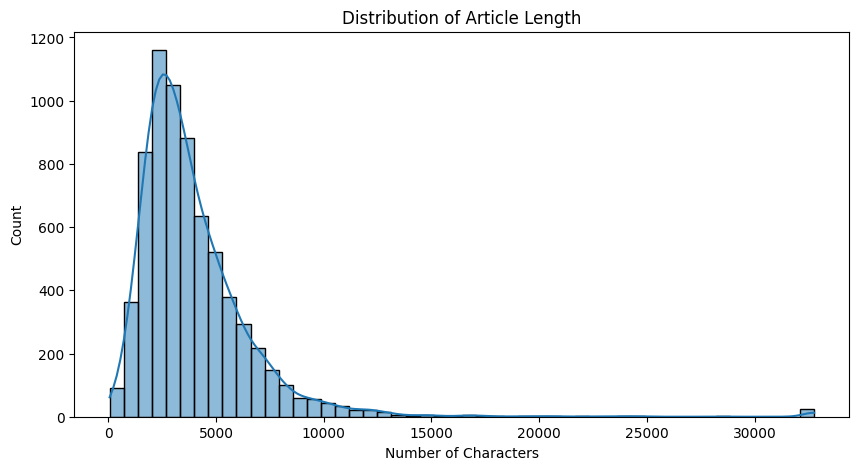

In [ ]:
df['article_length'] = df['full_article'].astype(str).apply(len)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['article_length'], bins=50, kde=True)
plt.title("Distribution of Article Length")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()


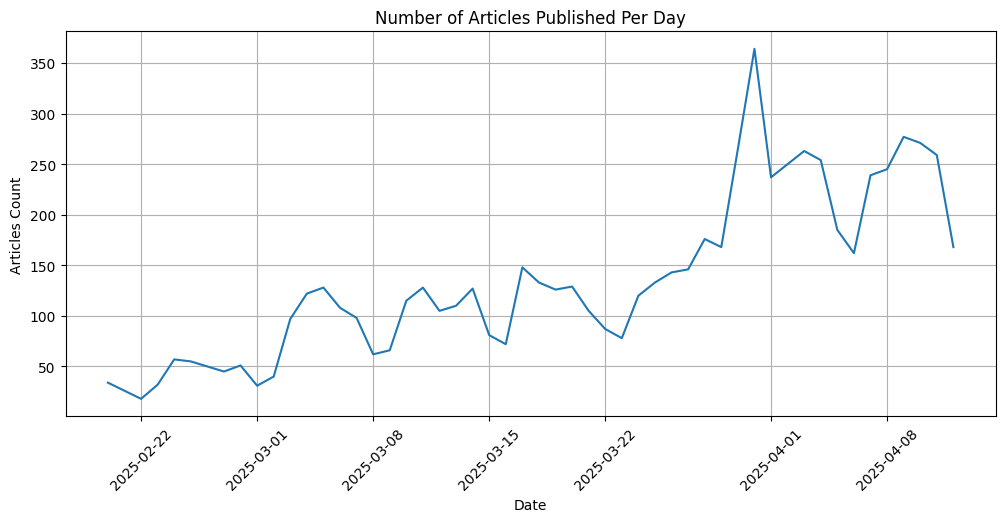

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['publish_date'] = df['publishedAt'].dt.date

articles_by_date = df['publish_date'].value_counts().sort_index()

plt.figure(figsize=(12,5))
articles_by_date.plot(kind='line')
plt.title("Number of Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Articles Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


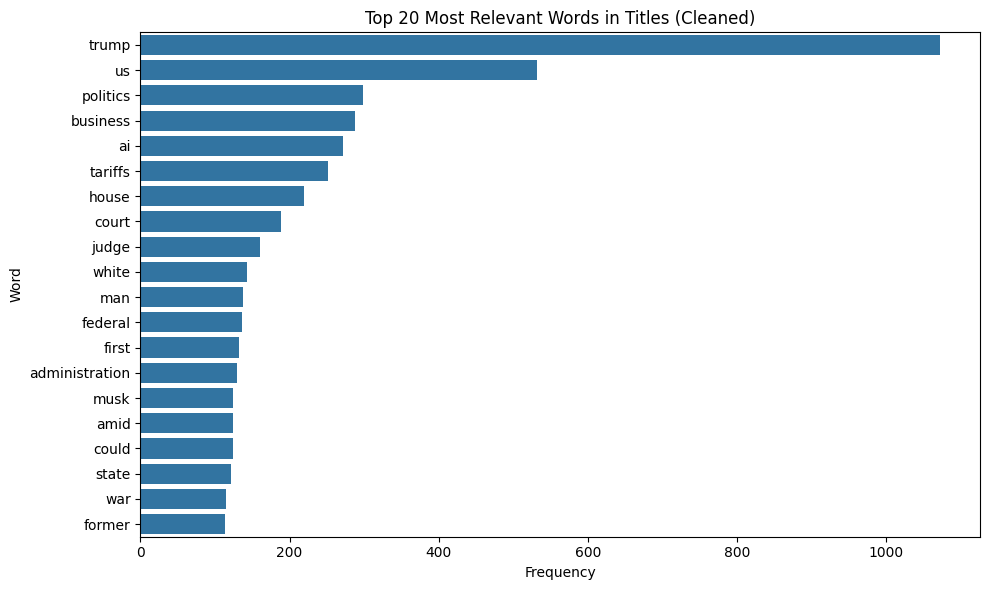

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Built-in + custom stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    "cnn", "fox", "news", "techcrunch", "say", "says", "said", "report", "reports",
    "breaking", "source", "article", "update", "trumps", "live", "new"
}
stop_words.update(custom_stopwords)

def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # remove punctuation
    words = text.lower().split()
    return [word for word in words if word not in stop_words]

# Apply on titles
words = []
df['title'].dropna().apply(lambda x: words.extend(clean_and_tokenize(x)))

# Count top words
word_freq = Counter(words)
common_words = word_freq.most_common(20)

# Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=common_words_df, x='count', y='word')
plt.title("Top 20 Most Relevant Words in Titles (Cleaned)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [ ]:
# Full row duplicates
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")

# Duplicate titles
duplicate_titles = df[df.duplicated('title')]
print(f"Duplicate titles: {duplicate_titles.shape[0]}")

# Duplicate URLs
duplicate_urls = df[df.duplicated('url')]
print(f"Duplicate URLs: {duplicate_urls.shape[0]}")


Total duplicate rows: 0
Duplicate titles: 235
Duplicate URLs: 222


source_name
Fox News      2511
ABC News      1970
CNN           1617
TechCrunch     891
Name: count, dtype: int64


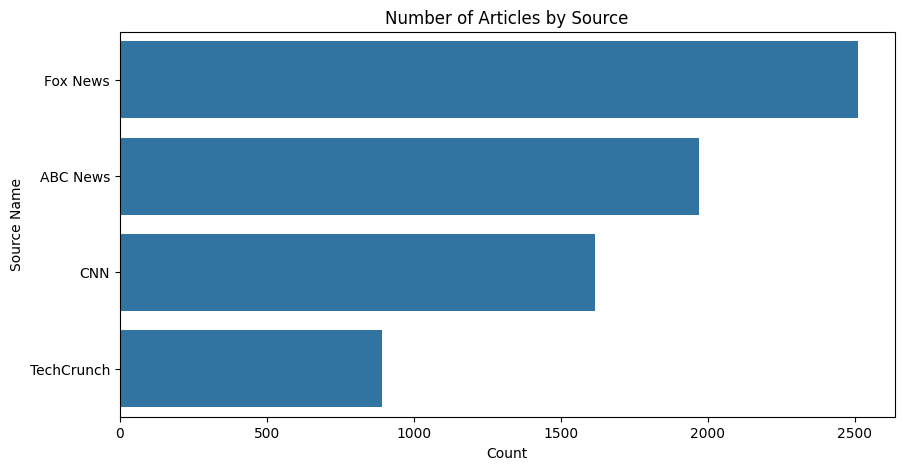

In [ ]:
source_counts = df['source_name'].value_counts()

# Display
print(source_counts)

# Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Number of Articles by Source")
plt.xlabel("Count")
plt.ylabel("Source Name")
plt.show()


In [ ]:
df['article_length'] = df['full_article'].astype(str).apply(len)
df.groupby('source_name')['article_length'].describe()


,count,mean,std,min,25%,50%,75%,max
source_name,,,,,,,,
ABC News,1970.0,3694.470558,2170.950659,80.0,2205.75,3309.5,4812.25,23729.0
CNN,1617.0,5664.388992,4525.069237,259.0,2891.00,4804.0,7051.00,32767.0
Fox News,2511.0,3391.985265,1552.143384,274.0,2319.50,3070.0,4135.00,18327.0
TechCrunch,891.0,3105.973064,2242.831068,57.0,1685.00,2546.0,3916.50,22030.0


<Axes: title={'center': 'Articles by Day of Week'}, xlabel='weekday'>

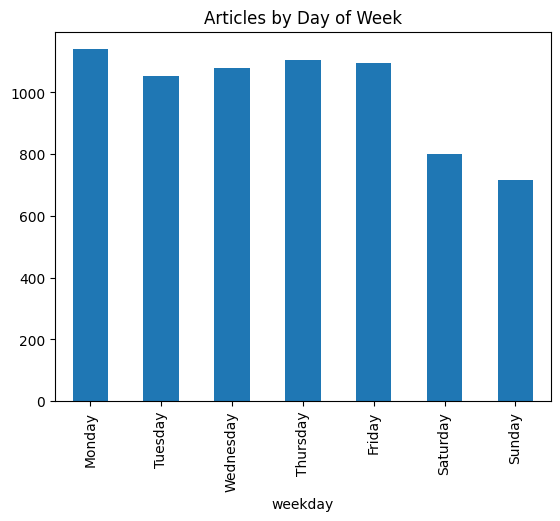

In [ ]:
df['weekday'] = df['publishedAt'].dt.day_name()
df['hour'] = df['publishedAt'].dt.hour

# Plot
df['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', title='Articles by Day of Week')


<Axes: title={'center': 'Top Authors'}, ylabel='author'>

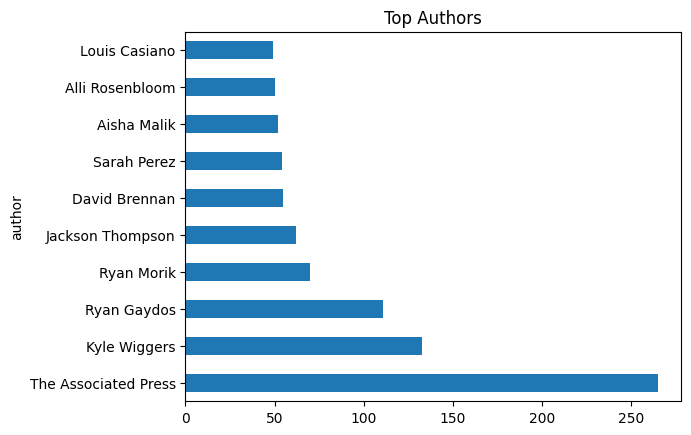

In [ ]:
df['author'].value_counts().head(10).plot(kind='barh', title='Top Authors')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['title'].dropna())
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]


<Axes: >

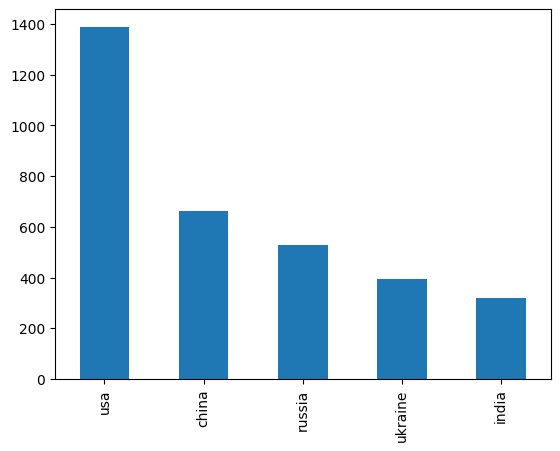

In [ ]:
countries = ['usa', 'china', 'russia', 'ukraine', 'india']
df['content_lower'] = df['full_article'].astype(str).str.lower()
for country in countries:
    df[country] = df['content_lower'].str.contains(country).astype(int)

df[countries].sum().sort_values(ascending=False).plot(kind='bar')
